In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import imblearn
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [26]:
data = pd.read_csv('../tables/data_all.csv')
data['Life_bin'] = np.zeros(len(data))
data.loc[(data.Life_Surf ==1) | (data.Life_Sub == 1),'Life_bin'] = 1
data = data.drop(data.index[np.isnan(data['Life'])]).reset_index(drop=True)
data

,Teff,age,Lx,Rs,loc,Teq,Bfield,rho,Rp,Psurf,...,Tsurf,sal,pH,Aw,Life_Surf,Life_Sub,Life,Planet,Life_4comb,Life_bin
0,3252.895461,5.008207,0.000005,0.210784,0.016239,545.427269,0.718454,7.609923,1.114976,0.054930,...,303.225685,22.021751,8.586133,0.962399,0.0,0.0,0.0,GJ-1132b,0.0,0.0
1,3546.034985,4.989730,0.000003,0.202281,0.015047,527.637939,0.545787,5.424337,1.193263,0.392653,...,508.381469,7.399327,3.932809,0.817788,0.0,0.0,0.0,GJ-1132b,0.0,0.0
2,3229.023196,5.003891,0.000004,0.207189,0.015744,519.483858,0.957482,7.477952,1.103296,0.709591,...,783.193727,2.728278,4.162974,0.704331,0.0,0.0,0.0,GJ-1132b,0.0,0.0
3,3072.870969,5.006503,0.000004,0.220353,0.015021,525.917339,0.813297,6.868036,1.108112,0.456141,...,556.883318,4.160200,4.773410,0.681685,0.0,0.0,0.0,GJ-1132b,0.0,0.0
4,3185.925252,4.988552,0.000004,0.214874,0.015777,526.933313,1.053285,5.246595,1.146630,0.371185,...,490.763925,7.801271,4.763402,0.907144,0.0,0.0,0.0,GJ-1132b,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140177,2544.859297,7.471444,0.000354,0.119351,0.038455,184.189272,0.941152,5.238453,1.050897,1.004262,...,30.200353,20.392556,8.516083,0.990624,0.0,1.0,1.0,TRAPPIST-1f,1.0,1.0
140178,2555.444817,9.826661,0.000401,0.121573,0.038416,199.799745,0.732754,4.952269,1.022273,1.004558,...,30.943480,2.335484,5.153681,0.964995,0.0,1.0,1.0,TRAPPIST-1f,1.0,1.0
140179,2595.714241,7.059310,0.000325,0.117958,0.038727,208.021856,0.534282,5.141859,1.041698,0.986770,...,33.965829,1.652801,3.912795,0.930923,0.0,1.0,1.0,TRAPPIST-1f,1.0,1.0
140180,2566.269606,8.714504,0.000356,0.117075,0.038559,176.432263,0.814159,5.123637,1.058712,0.994800,...,29.990909,20.417192,10.117227,0.986863,0.0,1.0,1.0,TRAPPIST-1f,1.0,1.0


In [27]:
features = ['Lx', 'loc', 'Teq', 'Bfield', 'rho', 'Psurf', 'WMF', 'Tsurf', 'sal', 'pH', 'Aw']
target = ['Life_bin']
X = data[features].values
y = data[target]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
forest = RandomForestClassifier(max_samples=200, max_depth=2, max_leaf_nodes= 3, min_samples_split=2, min_samples_leaf=2,
                               class_weight={0:2.,1:1.})
forest.fit(X_train, np.ravel(y_train))
y_pred = forest.predict(X_test)


In [104]:
print("")
print("accuracy_score: {}".format(accuracy_score(y_test, y_pred)))

print("")
print("precision_score: {}".format(precision_score(y_test, y_pred)))

print("")
print("recall_score: {}".format(recall_score(y_test, y_pred)))

print("")
print("f1_score: {}".format(f1_score(y_test, y_pred)))

print("")
print("Simply counting stars")
print(confusion_matrix(y_test, y_pred, normalize=None))

print("")
print("N stars/ All true stars of that class")
print(confusion_matrix(y_test, y_pred, normalize='true'))

print("")
print("N stars/ All stars predicted to belong to that class")
print(confusion_matrix(y_test, y_pred, normalize='pred'))

print("")
print("N stars/ All stars")
print(confusion_matrix(y_test, y_pred, normalize='all'))



accuracy_score: 0.9476406177551093

precision_score: 0.9307979730767262

recall_score: 0.9936615485492596

f1_score: 0.961203023415614

Simply counting stars
[[ 8384  1352]
 [  116 18185]]

N stars/ All true stars of that class
[[0.86113394 0.13886606]
 [0.00633845 0.99366155]]

N stars/ All stars predicted to belong to that class
[[0.98635294 0.06920203]
 [0.01364706 0.93079797]]

N stars/ All stars
[[0.29903342 0.04822199]
 [0.00413739 0.6486072 ]]


<BarContainer object of 11 artists>

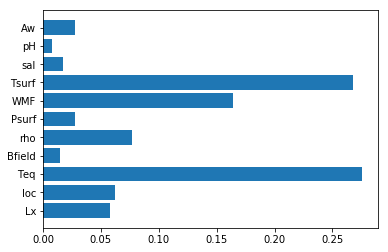

In [105]:
plt.barh(features, forest.feature_importances_)
